In [2]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

mesh = trimesh.load_mesh("../data/stl/EA-HV_electrode.STL")

To see the light response of the electrodes, we'll pixelize the electrode into a bunch of different pieces that we will use as individual channels in chroma. We'll do this pixelization using kmeans clustering to create 5,000 individual channels.

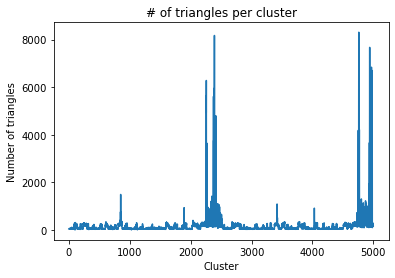

In [3]:
from sklearn.cluster import BisectingKMeans

# 'unsimplify' triangles such that each triangle edge is less than 1 mm long
mesh = mesh.subdivide_to_size(1)
areas = mesh.area_faces.tolist()
centroids = mesh.triangles_center.tolist()

# bisecting kmeans gives nicer clusters than kmeans
kmeans = BisectingKMeans(n_clusters=5000)
clusters = kmeans.fit_predict(centroids, sample_weight=areas)

plt.plot(np.unique(clusters, return_counts=True)[1])
plt.title('# of triangles per cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of triangles')
plt.show()

In [4]:
import numpy as np
from tqdm import trange

# change me
save = False
plot = False

tot_mesh = []
for cluster in trange(kmeans.n_clusters):
    
    # create a new submesh for each cluster and color it a random color
    submesh = mesh.submesh([np.where(clusters == cluster)[0]], append=True)
    submesh.visual.face_colors = trimesh.visual.random_color()
    tot_mesh.append(submesh)
    
    if save:
        submesh.export(f'../data/stl/electrode_stls/5000_parts/cluster_{cluster}.stl')

if plot:
    trimesh.Scene(tot_mesh).show()

100%|██████████| 5000/5000 [00:04<00:00, 1176.34it/s]
